In [2]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import matplotlib.pylab as plt
import time
from IPython import display
%matplotlib inline

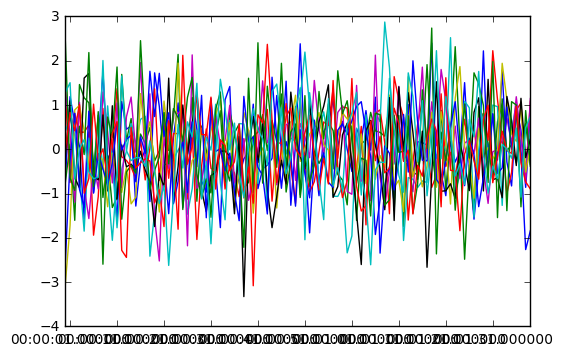

In [3]:
i = pd.date_range('2013-1-1',periods=100,freq='s')

while True:
    try:
        plt.plot(pd.Series(data=np.random.randn(100), index=i))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    except KeyboardInterrupt:
        break

In [125]:
import random

iterations = 300

doors = ["goat"] * 2 + ["car"]
change_wins = 0
change_loses = 0

data_holder = {}

for i in range(1,iterations+1):
    
    random.shuffle(doors)
    # you pick door n:
    n = random.randrange(3)
    # monty picks door k, k!=n and doors[k]!="car"
    sequence = range(3)
    random.shuffle(sequence)
    for k in sequence:
        if k == n or doors[k] == "car":
            continue
    # now if you change, you lose iff doors[n]=="car"
    if doors[n] == "car":
        change_loses += 1
    else:
        change_wins += 1
    
    total = (change_wins + change_loses)
    pwins = (100.0*change_wins)/total
    ploses = (100.0*change_loses)/total
    
    data_holder[i] = [change_wins, change_loses, pwins, ploses]
    
        

print "Changing has %s wins and %s losses" % (change_wins, change_loses)
perc = (100.0 * change_wins) / (change_wins + change_loses)
print "IOW, by changing you win %.1f%% of the time" % perc

Changing has 190 wins and 110 losses
IOW, by changing you win 63.3% of the time


In [126]:
df = DataFrame.from_dict(data_holder, orient='index')
df.columns = ['wins','loses','pwins', 'ploses']
df.head()

,wins,loses,pwins,ploses
1,0,1,0.000000,100.000000
2,1,1,50.000000,50.000000
3,2,1,66.666667,33.333333
4,3,1,75.000000,25.000000
5,4,1,80.000000,20.000000


In [127]:
#df['pwins'] = pd.expanding_mean(df['pwins'], min_periods=1)
#df['ploses'] = pd.expanding_mean(df['ploses'], min_periods=1)

In [128]:
## import plotly
import plotly 
plotly.tools.set_credentials_file(username='dzhamzic', api_key='5JXEeGtsqJBzakPUoHKj')
plotly.tools.set_config_file(world_readable=True, sharing='public')
import plotly.graph_objs as go

In [129]:


trace_high1 = go.Scatter(
    x=df.index,
    y=df['wins'],
    name = "wins",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low1 = go.Scatter(
    x=df.index,
    y=df['loses'],
    name = "loses",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

trace_high = go.Scatter(
    x=df.index,
    y=df['pwins'],
    name = "wins %",
    line = dict(color = '#0000FF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=df.index,
    y=df['ploses'],
    name = "loses %",
    line = dict(color = '#FF0000'),
    opacity = 0.8)

data = [trace_high,trace_low, trace_high1, trace_low1]

layout = dict(
    title='Monty Hall Simulation - Winning/Losing',
    xaxis=dict(
        title = "Number of simulations",
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict()
        #type='date'
    )
)

fig = dict(data=data, layout=layout)
plotly.plotly.iplot(fig, filename = "MontyHall-Simulation")

In [73]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

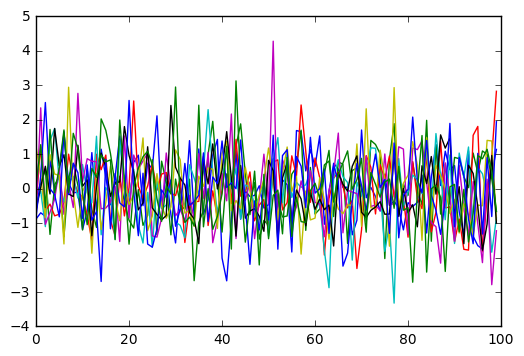

In [45]:
i = df.index
holder = [0] * i
for val in df.index:
    print val, df.ix[val]["wins"]
    while True:
        try:
            plt.plot(pd.Series(data=np.random.randn(100), index=i))
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(1)
        except KeyboardInterrupt:
            break

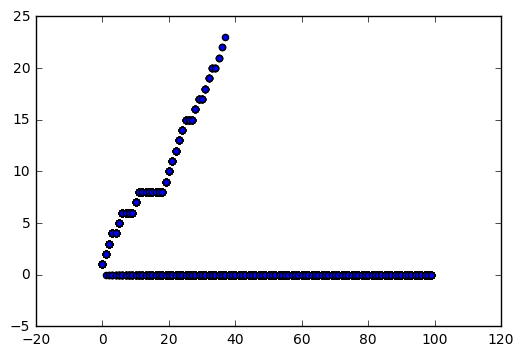

In [112]:
i = df.index.values
holder = [0] * len(i)
print holder
for val in df.index:
    current_wins = df.ix[0:val]["wins"].values.tolist()
    current_loses = df.ix[0:val]["loses"].values.tolist()
    for n in range(len(current_wins), len(i)):
        current_wins.append(0)
        current_loses.append(0)
        dfv = pd.DataFrame(current_wins,current_loses)
        dfv.set_index = df.index.values
        dfv.columns = [''] * len(dfv.columns)
    #print val, current_wins
    try:
        plt.scatter(i,dfv)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(1)
    except KeyboardInterrupt:
        break    
    

In [132]:
labels = ['Change Wins','Change Loses']
values = [change_wins,change_loses]

layout = go.Layout(
    title='Plot Title',
    xaxis=dict(
        title='x Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='y Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

trace = go.Pie(labels=labels, values=values)

plotly.plotly.iplot([trace], layout=layout,filename='MontyHall-Simulation-PieChart')